<a href="https://colab.research.google.com/github/MinakoNG63/DSFB/blob/main/14_Apply_Feature_Transformation_on_Titanic_63070240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice to Apply Feature Transformation on Titanic Dataset

Term 1 2022 - Instructor: Teerapong Leelanupab

Teaching Assistant:
1. Piyawat Chuangkrud (Sam)
2. Suvapat Manu (Mint)

***

In [ ]:
# This is for setting an output to show more row

# pd.set_option('display.max_colwidth', None)
# pd.set_option('max_rows', 500)
# pd.set_option('max_colwidth', 400)
# pd.describe_option('max_colwidth')

In [ ]:
#---------------------------------
#download files จาก google drive
#---------------------------------
#download Titanic_dataset.zip
!gdown --id 1t3a4iZr6f4xfPXNl1e3Kw78l3pBiEEVw

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1t3a4iZr6f4xfPXNl1e3Kw78l3pBiEEVw
To: /content/Titanic_dataset.zip
100% 46.5k/46.5k [00:00<00:00, 55.5MB/s]


In [ ]:
!unzip Titanic_dataset.zip

Archive:  Titanic_dataset.zip
replace titanic.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: titanic.csv             
  inflating: pre_split/test.csv      
  inflating: pre_split/train.csv     
  inflating: description.txt         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data

In [ ]:
def load_data():
  titanic_df = pd.read_csv('titanic.csv')
  return titanic_df

In [ ]:
titanic_df = load_data()

In [ ]:
# explore metadata of our dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# another handy attribute to check type of values in each column
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# check simple statistics of dataset จะแสดงเฉพาะ numeric
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.sort_values(by=['PassengerId'], inplace=True)

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Clean data

## 2.1 Identify and Eliminate Missing Values

In [ ]:
#check whether there are any miss values
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Because Age is a numeric variable, we will fill nan by mean of age
mean_age = titanic_df['Age'].mean()
mean_age

29.69911764705882

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df[titanic_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Because 'Embarked' is a categorical variable and there are not many missing values, we will fill nan by mode
mode_embarked = titanic_df['Embarked'].mode()[0] #อย่าลืมใส่ index 0 ไม่งั้นไม่ออก
mode_embarked

'S'

In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
titanic_df[titanic_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Because 'Cabin' is a categorical variable and there are too many of them, we will fill them by a new label, 'nocabin'
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('nocabin')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 2.2 <font color='red'>Clean data **function**</font>
<font color='red'>Good Practice</font> is to create a function for one purpose

In [ ]:
# สร้า fn สำหรับ clean data

def clean_data(df):
  df['Cabin'] = df['Cabin'].fillna('nocabin')
  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  return df

In [ ]:
clean_titanic_df = clean_data(titanic_df)
clean_titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 2.3 <font color='red'>Split data **function**</font>
<font color='red'>Split data (by column)</font> into training features, denoted by <font color='red'>*X*</font>, and a target label, denoted by <font color='red'>*y*</font>

In [ ]:
def split_data_label(df):
  y = df['Survived']
  X = df.drop('Survived', axis=1)
  return X, y

In [ ]:
X, y = split_data_label(clean_titanic_df)

# 3. Extract features

### 3.1 Extract Cabin Zone (the first letter in the Cabin.)

In [ ]:
# We create a new feature by extract CabinZone of the cabin as the cabin tells us about the class
# The first class had the top decks (A-E), second class (D-F), and third class (E-G).
X['CabinZone'] = X['Cabin'].str[0]
X.groupby(by='CabinZone').size()

CabinZone
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
dtype: int64

In [ ]:
X['CabinZone'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinZone, dtype: int64

### 3.2 Extract the initial from the name of the passenger

In [ ]:
#Inspect uncommon initials, like Dr, Capt, MAster
X[X['Name'].str.contains('Dr\.')]['Name']

245      Minahan, Dr. William Edward
317             Moraweck, Dr. Ernest
398                 Pain, Dr. Alfred
632        Stahelin-Maeglin, Dr. Max
660    Frauenthal, Dr. Henry William
766        Brewe, Dr. Arthur Jackson
796      Leader, Dr. Alice (Farnham)
Name: Name, dtype: object

In [ ]:
X[X['Name'].str.contains('Capt')]['Name']

745    Crosby, Capt. Edward Gifford
Name: Name, dtype: object

In [ ]:
X[X['Name'].str.contains('Major')]['Name']

449       Peuchen, Major. Arthur Godfrey
536    Butt, Major. Archibald Willingham
Name: Name, dtype: object

In [ ]:
names = ['Braund, Mr. Owen Harris',
         'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
         'Petroff, Mr. Pastcho ("Pentcho")']

for i in range(len(names)):
  initial = names[i].split(',')[1].split('.')[0].strip()
  print(initial)

Mr
Mrs
Mr


In [ ]:
initial = names[0]
initial

'Braund, Mr. Owen Harris'

In [ ]:
initial = names[0].split(', ')[1]
initial

'Mr. Owen Harris'

In [ ]:
initial = names[0].split(', ')[1].split('.')[0]
initial

'Mr'

#### <font color='red'>A special **function** for extract Initial of passenger</font>

In [ ]:
#create a special function to extract the initial
def getinitialfeature(df):
  initial = []
  for i in range(len(df)):
    fn = df['Name'][i]
    initial.append(fn.split(',')[1].split('.')[0].strip())
  return initial

In [ ]:
X['Initial'] = getinitialfeature(X)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinZone,Initial
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,nocabin,S,n,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,nocabin,S,n,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,nocabin,S,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,nocabin,S,n,Rev
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,nocabin,S,n,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,Mr


In [ ]:
X['Initial'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Initial, dtype: int64

### 3.3 Extract a new Feature from 'Ticket' number by checking whether it contains only any string or letter in a ticker number

<font color='red'>Another special **function** for ticket feature</font>

In [ ]:
def getnumticket(ticketList):
  numticket = []
  for i in range(len(ticketList)):
    try:
      int(ticketList[i])
      numticket.append(1)
    except:
      numticket.append(0)
  return numticket

In [ ]:
ticketList = X['Ticket'].values
X['Only_Num_in_Ticket'] = getnumticket(ticketList)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinZone,Initial,Only_Num_in_Ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,nocabin,S,n,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,nocabin,S,n,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,nocabin,S,n,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,nocabin,S,n,Rev,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,Miss,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,nocabin,S,n,Miss,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,Mr,1


In [ ]:
X['Only_Num_in_Ticket'].value_counts()

1    661
0    230
Name: Only_Num_in_Ticket, dtype: int64

### 3.4 Quantize Fare

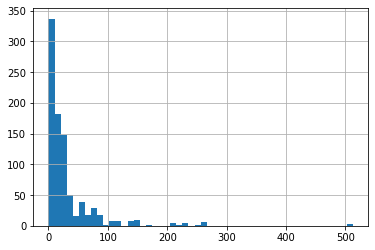

In [ ]:
X['Fare'].hist(bins=50)

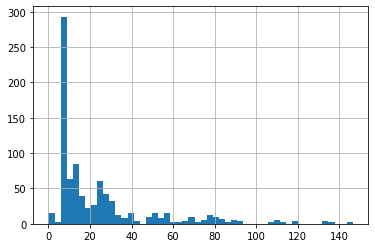

In [ ]:
X['Fare'][X['Fare']<150].hist(bins=50)

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = X['Fare'].quantile(quantile_list)
quantiles

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

Let’s now visualize these quantiles in the original distribution histogram!

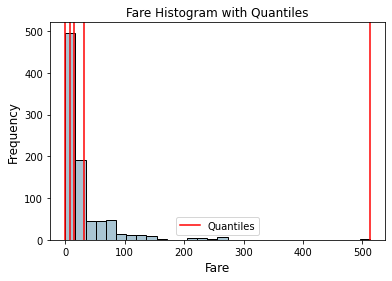

In [ ]:
fig, ax = plt.subplots()
X['Fare'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Fare Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
X['Fare_Adaptive_Bin'] = pd.qcut(X['Fare'], q=quantile_list, labels=quantile_labels)

X[['PassengerId', 'Fare', 'Fare_Adaptive_Bin']].iloc[4:9]

,PassengerId,Fare,Fare_Adaptive_Bin
4,5,8.0500,25-50Q
5,6,8.4583,25-50Q
6,7,51.8625,75-100Q
7,8,21.0750,50-75Q
8,9,11.1333,25-50Q


We can also apply Fixed binning

In [ ]:
bin_ranges = [-1, 25, 50, 75, 100, 600]
bin_names = ['A', 'B', 'C', 'D', 'E']
X['Fare_Fixed_Bin'] = pd.cut(np.array(X['Fare']),  bins=bin_ranges, labels=bin_names)
X[['PassengerId', 'Fare', 'Fare_Fixed_Bin']]

,PassengerId,Fare,Fare_Fixed_Bin
0,1,7.2500,A
1,2,71.2833,C
2,3,7.9250,A
3,4,53.1000,C
4,5,8.0500,A
...,...,...,...
886,887,13.0000,A
887,888,30.0000,B
888,889,23.4500,A
889,890,30.0000,B


### 3.5 Get numeric columns

In [ ]:
temp_feature = X._get_numeric_data() # เลือกเฉพาะ column ที่มีแต่ตัวเลข
temp_feature.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,1


### 3.6 Get categorical columns

In [ ]:
# method1
numeric_cols = X._get_numeric_data().columns
X[X.columns.difference(numeric_cols)]

,Cabin,CabinZone,Embarked,Fare_Adaptive_Bin,Fare_Fixed_Bin,Initial,Name,Sex,Ticket
0,nocabin,n,S,0-25Q,A,Mr,"Braund, Mr. Owen Harris",male,A/5 21171
1,C85,C,C,75-100Q,C,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,nocabin,n,S,25-50Q,A,Miss,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,C123,C,S,75-100Q,C,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,nocabin,n,S,25-50Q,A,Mr,"Allen, Mr. William Henry",male,373450
...,...,...,...,...,...,...,...,...,...
886,nocabin,n,S,25-50Q,A,Rev,"Montvila, Rev. Juozas",male,211536
887,B42,B,S,50-75Q,B,Miss,"Graham, Miss. Margaret Edith",female,112053
888,nocabin,n,S,50-75Q,A,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607
889,C148,C,C,50-75Q,B,Mr,"Behr, Mr. Karl Howell",male,111369


In [ ]:
X.dtypes

PassengerId              int64
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                object
CabinZone               object
Initial                 object
Only_Num_in_Ticket       int64
Fare_Adaptive_Bin     category
Fare_Fixed_Bin        category
dtype: object

In [ ]:
# method 2
cate_cols = [index for index, dtype in X.dtypes.items() if (dtype.name == 'object' or dtype.name == 'category')]
X[cate_cols]

,Name,Sex,Ticket,Cabin,Embarked,CabinZone,Initial,Fare_Adaptive_Bin,Fare_Fixed_Bin
0,"Braund, Mr. Owen Harris",male,A/5 21171,nocabin,S,n,Mr,0-25Q,A
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C,Mrs,75-100Q,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,nocabin,S,n,Miss,25-50Q,A
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C,Mrs,75-100Q,C
4,"Allen, Mr. William Henry",male,373450,nocabin,S,n,Mr,25-50Q,A
...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,nocabin,S,n,Rev,25-50Q,A
887,"Graham, Miss. Margaret Edith",female,112053,B42,S,B,Miss,50-75Q,B
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,nocabin,S,n,Miss,50-75Q,A
889,"Behr, Mr. Karl Howell",male,111369,C148,C,C,Mr,50-75Q,B


### 3.7 Drop unwanted features as we already create a new one

In [ ]:
# inplace พอใช้เสร็จให้เซฟทับ ไม่งั้นก็หาตัวแปลมารองรับก็ได้

# from 3.1 Cabin
X.drop('Cabin', axis=1, inplace=True)
# from 3.2 Name
X.drop('Name', axis=1, inplace=True)
# from 3.3 Ticket
X.drop('Ticket', axis=1, inplace=True)
# from 3.4 Fare_Fixed_Bin
X.drop('Fare_Fixed_Bin', axis=1, inplace=True)
X.head(10)

KeyError: ignored

In [ ]:
#re-check categorical features
numeric_cols = X._get_numeric_data().columns
X[X.columns.difference(numeric_cols)]

,CabinZone,Embarked,Fare_Adaptive_Bin,Initial,Sex
0,n,S,0-25Q,Mr,male
1,C,C,75-100Q,Mrs,female
2,n,S,25-50Q,Miss,female
3,C,S,75-100Q,Mrs,female
4,n,S,25-50Q,Mr,male
...,...,...,...,...,...
886,n,S,25-50Q,Rev,male
887,B,S,50-75Q,Miss,female
888,n,S,50-75Q,Miss,female
889,C,C,50-75Q,Mr,male


### 3.8 Encode all categorical features

#### 3.8.1 Apply OneHotEncoding to CabinZone

In [ ]:
X['CabinZone'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# encode CabinZone using one-hot encoding scheme
enc = OneHotEncoder(categories='auto')
feature_arr = enc.fit_transform(X[['CabinZone']]).toarray()

feature_labels = ['CabinZone_' + str(cls_label) for cls_label in enc.categories_[0]]
cabin_zone_features = pd.DataFrame(feature_arr, columns=feature_labels)
cabin_zone_features

,CabinZone_A,CabinZone_B,CabinZone_C,CabinZone_D,CabinZone_E,CabinZone_F,CabinZone_G,CabinZone_T,CabinZone_n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.8.2 Apply OneHotEncoding to Embarked

In [ ]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
embarked_features = pd.get_dummies(X['Embarked'])
embarked_features

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
feature_labels = ['Embarked_' + str(cls_label) for cls_label in embarked_features.columns]
embarked_features.columns = feature_labels
embarked_features

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


#### 3.8.3 Apply OneHotEncoding to Fare_Adaptive_Bin

In [ ]:
X['Fare_Adaptive_Bin'].unique()

['0-25Q', '75-100Q', '25-50Q', '50-75Q']
Categories (4, object): ['0-25Q' < '25-50Q' < '50-75Q' < '75-100Q']

In [ ]:
fare_adap_bin_features = pd.get_dummies(X['Fare_Adaptive_Bin'])
fare_adap_bin_features

,0-25Q,25-50Q,50-75Q,75-100Q
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,0,0,1,0
888,0,0,1,0
889,0,0,1,0


In [ ]:
feature_labels = ['FareAdapBin_' + str(cls_label) for cls_label in fare_adap_bin_features.columns]
fare_adap_bin_features.columns = feature_labels
fare_adap_bin_features

,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,0,0,1,0
888,0,0,1,0
889,0,0,1,0


#### 3.8.4 Apply Dummy Coding Scheme to Sex (Male flag)

In [ ]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# method 1
male_series = (X['Sex']=='male').astype('int')
male_features = pd.DataFrame({'male': male_series})
male_features

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
#method 2
male_features = pd.get_dummies(X['Sex'], drop_first=True)
male_features

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


### 3.8.5 Apply LabelEncoding to Initial

In [ ]:
enc = LabelEncoder()
initial_arr = enc.fit_transform(X['Initial'])
initial_features = pd.DataFrame({'Initial_Feature': initial_arr})
initial_features

,Initial_Feature
0,11
1,12
2,8
3,12
4,11
...,...
886,14
887,8
888,8
889,11


In [ ]:
#check how the labels are mapped with the numerical features
initial_mappings = {index: label for index, label in enumerate(enc.classes_)}
initial_mappings

{0: 'Capt',
 1: 'Col',
 2: 'Don',
 3: 'Dr',
 4: 'Jonkheer',
 5: 'Lady',
 6: 'Major',
 7: 'Master',
 8: 'Miss',
 9: 'Mlle',
 10: 'Mme',
 11: 'Mr',
 12: 'Mrs',
 13: 'Ms',
 14: 'Rev',
 15: 'Sir',
 16: 'the Countess'}

### 3.9 Cancatenate all features to the original dataframe

In [ ]:
X = pd.concat([X,cabin_zone_features,embarked_features,fare_adap_bin_features, male_features,initial_features],axis=1)
X_copy_w_categories = X.copy()
X_copy_w_categories

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinZone,Initial,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,1,3,male,22.000000,1,0,7.2500,S,n,Mr,...,1.0,0,0,1,1,0,0,0,1,11
1,2,1,female,38.000000,1,0,71.2833,C,C,Mrs,...,0.0,1,0,0,0,0,0,1,0,12
2,3,3,female,26.000000,0,0,7.9250,S,n,Miss,...,1.0,0,0,1,0,1,0,0,0,8
3,4,1,female,35.000000,1,0,53.1000,S,C,Mrs,...,0.0,0,0,1,0,0,0,1,0,12
4,5,3,male,35.000000,0,0,8.0500,S,n,Mr,...,1.0,0,0,1,0,1,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S,n,Rev,...,1.0,0,0,1,0,1,0,0,1,14
887,888,1,female,19.000000,0,0,30.0000,S,B,Miss,...,0.0,0,0,1,0,0,1,0,0,8
888,889,3,female,29.699118,1,2,23.4500,S,n,Miss,...,1.0,0,0,1,0,0,1,0,0,8
889,890,1,male,26.000000,0,0,30.0000,C,C,Mr,...,0.0,1,0,0,0,0,1,0,1,11


In [ ]:
X = X_copy_w_categories._get_numeric_data()
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket,CabinZone_A,CabinZone_B,CabinZone_C,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,1,3,22.000000,1,0,7.2500,0,0.0,0.0,0.0,...,1.0,0,0,1,1,0,0,0,1,11
1,2,1,38.000000,1,0,71.2833,0,0.0,0.0,1.0,...,0.0,1,0,0,0,0,0,1,0,12
2,3,3,26.000000,0,0,7.9250,0,0.0,0.0,0.0,...,1.0,0,0,1,0,1,0,0,0,8
3,4,1,35.000000,1,0,53.1000,1,0.0,0.0,1.0,...,0.0,0,0,1,0,0,0,1,0,12
4,5,3,35.000000,0,0,8.0500,1,0.0,0.0,0.0,...,1.0,0,0,1,0,1,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1,0.0,0.0,0.0,...,1.0,0,0,1,0,1,0,0,1,14
887,888,1,19.000000,0,0,30.0000,1,0.0,1.0,0.0,...,0.0,0,0,1,0,0,1,0,0,8
888,889,3,29.699118,1,2,23.4500,0,0.0,0.0,0.0,...,1.0,0,0,1,0,0,1,0,0,8
889,890,1,26.000000,0,0,30.0000,1,0.0,0.0,1.0,...,0.0,1,0,0,0,0,1,0,1,11


In [ ]:
# Drop a sample ID (passenger ID) as we don't use them as traing features
X.drop('PassengerId', axis=1, inplace=True)
X

KeyError: ignored

# 3.10 Feature Scaling


**sklearn Preprocessing and Normalization** <br />
[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

**Normalization vs Standardization** <br />
[https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)



Examples of Algorithms where Feature Scaling matters
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.
In Short, any Algorithm which is Not Distance based is Not affected by Feature Scaling.

### 3.10.1 MinMaxScaler

In [ ]:
# method 1
from sklearn.preprocessing import minmax_scale
minmax_scale(X)

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 1.        ,
        0.6875    ],
       [0.        , 0.4722292 , 0.125     , ..., 1.        , 0.        ,
        0.75      ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.36792055, 0.125     , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.6875    ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 1.        ,
        0.6875    ]])

In [ ]:
# this how to preserve the columns name
X_temp = X.copy()
X_temp.loc[:, X_temp.columns] = minmax_scale(X_temp)
X_temp

,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket,CabinZone_A,CabinZone_B,CabinZone_C,CabinZone_D,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.6875
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7500
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5000
3,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.7500
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.8750
887,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5000
888,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5000
889,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.6875


In [ ]:
# method 2
from sklearn.preprocessing import MinMaxScaler

# Initialise the Normalizer
scaler = MinMaxScaler()

# To normalize data
scaler.fit_transform(X)

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 1.        ,
        0.6875    ],
       [0.        , 0.4722292 , 0.125     , ..., 1.        , 0.        ,
        0.75      ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.36792055, 0.125     , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.6875    ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 1.        ,
        0.6875    ]])

### 3.10.2 Normalization - scaling individual samples to have unit norm of vector

In [ ]:
# method 1
from sklearn.preprocessing import normalize
normalize(X)

array([[0.1157652 , 0.84894482, 0.0385884 , ..., 0.        , 0.0385884 ,
        0.42447241],
       [0.01224043, 0.46513653, 0.01224043, ..., 0.01224043, 0.        ,
        0.14688522],
       [0.10509795, 0.9108489 , 0.        , ..., 0.        , 0.        ,
        0.2802612 ],
       ...,
       [0.0771277 , 0.76354156, 0.02570923, ..., 0.        , 0.        ,
        0.20567387],
       [0.02423219, 0.63003696, 0.        , ..., 0.        , 0.02423219,
        0.2665541 ],
       [0.08592277, 0.91650955, 0.        , ..., 0.        , 0.02864092,
        0.31505016]])

In [ ]:
# this how to preserve the columns name
X = X.copy()
X.loc[:, X_temp.columns] = normalize(X_temp)
X

,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket,CabinZone_A,CabinZone_B,CabinZone_C,CabinZone_D,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,0.424018,0.114982,0.053002,0.000000,0.006000,0.000000,0.0,0.000000,0.000000,0.0,...,0.424018,0.000000,0.000000,0.424018,0.424018,0.000000,0.000000,0.000000,0.424018,0.291512
1,0.000000,0.241598,0.063952,0.000000,0.071184,0.000000,0.0,0.000000,0.511612,0.0,...,0.000000,0.511612,0.000000,0.000000,0.000000,0.000000,0.000000,0.511612,0.000000,0.383709
2,0.479267,0.154054,0.000000,0.000000,0.007414,0.000000,0.0,0.000000,0.000000,0.0,...,0.479267,0.000000,0.000000,0.479267,0.000000,0.479267,0.000000,0.000000,0.000000,0.239634
3,0.000000,0.198798,0.057188,0.000000,0.047417,0.457500,0.0,0.000000,0.457500,0.0,...,0.000000,0.000000,0.000000,0.457500,0.000000,0.000000,0.000000,0.457500,0.000000,0.343125
4,0.387442,0.168356,0.000000,0.000000,0.006088,0.387442,0.0,0.000000,0.000000,0.0,...,0.387442,0.000000,0.000000,0.387442,0.000000,0.387442,0.000000,0.000000,0.387442,0.266366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.201984,0.134927,0.000000,0.000000,0.010250,0.403968,0.0,0.000000,0.000000,0.0,...,0.403968,0.000000,0.000000,0.403968,0.000000,0.403968,0.000000,0.000000,0.403968,0.353472
887,0.000000,0.112488,0.000000,0.000000,0.028212,0.481798,0.0,0.481798,0.000000,0.0,...,0.000000,0.000000,0.000000,0.481798,0.000000,0.000000,0.481798,0.000000,0.000000,0.240899
888,0.470663,0.173166,0.058833,0.156888,0.021543,0.000000,0.0,0.000000,0.000000,0.0,...,0.470663,0.000000,0.000000,0.470663,0.000000,0.000000,0.470663,0.000000,0.000000,0.235331
889,0.000000,0.136083,0.000000,0.000000,0.024790,0.423356,0.0,0.000000,0.423356,0.0,...,0.000000,0.423356,0.000000,0.000000,0.000000,0.000000,0.423356,0.000000,0.423356,0.291057


In [ ]:
# method 2
from sklearn.preprocessing import Normalizer

# Initialise the Normalizer
normalizer = Normalizer()

# To normalize data
normalizer.fit_transform(X)

array([[0.42401757, 0.1149824 , 0.0530022 , ..., 0.        , 0.42401757,
        0.29151208],
       [0.        , 0.24159817, 0.06395151, ..., 0.51161209, 0.        ,
        0.38370907],
       [0.47926715, 0.15405446, 0.        , ..., 0.        , 0.        ,
        0.23963358],
       ...,
       [0.47066268, 0.17316647, 0.05883283, ..., 0.        , 0.        ,
        0.23533134],
       [0.        , 0.13608259, 0.        , ..., 0.        , 0.42335625,
        0.29105742],
       [0.38835722, 0.15411311, 0.        , ..., 0.        , 0.38835722,
        0.26699559]])

### 3.10.3 Standardization

In [ ]:
# method 1
from sklearn.preprocessing import scale
scale(X)

array([[ 0.9072165 , -0.58616768,  0.44417795, ..., -0.57314273,
         0.8125784 ,  0.42015481],
       [-1.59074704,  1.21783302,  0.63646088, ...,  2.05853363,
        -1.34974604,  2.30881467],
       [ 1.23270167, -0.0294754 , -0.4866034 , ..., -0.57314273,
        -1.34974604, -0.642579  ],
       ...,
       [ 1.18201117,  0.24282946,  0.54657086, ..., -0.57314273,
        -1.34974604, -0.73071053],
       [-1.59074704, -0.28553557, -0.4866034 , ..., -0.57314273,
         0.80920589,  0.41084102],
       [ 0.69713497, -0.02863977, -0.4866034 , ..., -0.57314273,
         0.6307245 , -0.08206676]])

In [ ]:
# this how to preserve the columns name
X_temp = X.copy()
X_temp.loc[:, X_temp.columns] = scale(X_temp)
X_temp

,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket,CabinZone_A,CabinZone_B,CabinZone_C,CabinZone_D,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,0.907217,-0.586168,0.444178,-0.481661,-0.491412,-1.682117,-0.130724,-0.235191,-0.265248,-0.195598,...,0.571529,-0.478993,-0.306998,0.617104,1.844345,-0.577378,-0.574020,-0.573143,0.812578,0.420155
1,-1.590747,1.217833,0.636461,-0.481661,0.967924,-1.682117,-0.130724,-0.235191,4.286732,-0.195598,...,-1.813100,2.462135,-0.306998,-1.607766,-0.576779,-0.577378,-0.574020,2.058534,-1.349746,2.308815
2,1.232702,-0.029475,-0.486603,-0.481661,-0.459771,-1.682117,-0.130724,-0.235191,-0.265248,-0.195598,...,0.882246,-0.478993,-0.306998,0.907005,-0.576779,2.032742,-0.574020,-0.573143,-1.349746,-0.642579
3,-1.590747,0.608025,0.517677,-0.481661,0.435840,0.820959,-0.130724,-0.235191,3.805281,-0.195598,...,-1.813100,-0.478993,-0.306998,0.792791,-0.576779,-0.577378,-0.574020,1.780188,-1.349746,1.477451
4,0.691744,0.174286,-0.486603,-0.481661,-0.489455,0.437657,-0.130724,-0.235191,-0.265248,-0.195598,...,0.365832,-0.478993,-0.306998,0.425188,-0.576779,1.532657,-0.574020,-0.573143,0.626058,-0.094955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.400824,-0.302005,-0.486603,-0.481661,-0.396260,0.528073,-0.130724,-0.235191,-0.265248,-0.195598,...,0.458771,-0.478993,-0.306998,0.511900,-0.576779,1.622657,-0.574020,-0.573143,0.710332,1.689403
887,-1.590747,-0.621705,-0.486603,-0.481661,0.005873,0.953899,-0.130724,4.443128,-0.265248,-0.195598,...,-1.813100,-0.478993,-0.306998,0.920285,-0.576779,-0.577378,2.017579,-0.573143,-1.349746,-0.616654
888,1.182011,0.242829,0.546571,2.285967,-0.143442,-1.682117,-0.130724,-0.235191,-0.265248,-0.195598,...,0.833856,-0.478993,-0.306998,0.861856,-0.576779,-0.577378,1.957681,-0.573143,-1.349746,-0.730711
889,-1.590747,-0.285536,-0.486603,-0.481661,-0.070742,0.634151,-0.130724,-0.235191,3.501491,-0.195598,...,-1.813100,1.954775,-0.306998,-1.607766,-0.576779,-0.577378,1.703219,-0.573143,0.809206,0.410841


In [ ]:
# method 2
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()

# To scale data
scaler.fit_transform(X)

array([[ 0.9072165 , -0.58616768,  0.44417795, ..., -0.57314273,
         0.8125784 ,  0.42015481],
       [-1.59074704,  1.21783302,  0.63646088, ...,  2.05853363,
        -1.34974604,  2.30881467],
       [ 1.23270167, -0.0294754 , -0.4866034 , ..., -0.57314273,
        -1.34974604, -0.642579  ],
       ...,
       [ 1.18201117,  0.24282946,  0.54657086, ..., -0.57314273,
        -1.34974604, -0.73071053],
       [-1.59074704, -0.28553557, -0.4866034 , ..., -0.57314273,
         0.80920589,  0.41084102],
       [ 0.69713497, -0.02863977, -0.4866034 , ..., -0.57314273,
         0.6307245 , -0.08206676]])

## 3.11 <font color='red'>Feature Extraction **function**</font>

***
We can re-start to run from here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
  titanic_df = pd.read_csv('titanic.csv')
  return titanic_df

def clean_data(df):
  df['Cabin'] = df['Cabin'].fillna('nocabin')
  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  return df

def split_data_label(df):
  y = df['Survived']
  X = df.drop('Survived', axis=1)
  return X, y

In [ ]:
titanic_df = load_data()
clean_titanic_df = clean_data(titanic_df)
X, y = split_data_label(clean_titanic_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize


# create a special function to extract the initial
def getinitialfeature(df):
  initial = []
  for i in range(len(df)):
    fn = df['Name'][i]
    initial.append(fn.split(',')[1].split('.')[0].strip())
  return initial

# create a special function to extract the ticket flag (Contain only number or not)
def getnumticket(ticketList):
  numticket = []
  for i in range(len(ticketList)):
    try:
      int(ticketList[i])
      numticket.append(1)
    except:
      numticket.append(0)
  return numticket

# -------------------------------------------------------------------------------------
# create a very special function to put what we do all together
# -------------------------------------------------------------------------------------
def extract_feat(df):
  X = df.copy()
  X = X.drop('PassengerId', axis=1)

  # 3.1 Cabin Zone
  X['CabinZone'] = X['Cabin'].str[0]

  # 3.2 Initial of passenger
  X['Initial'] = getinitialfeature(X)

  # 3.3 ticket flag
  ticketList = X['Ticket'].values
  X['Only_Num_in_Ticket'] = getnumticket(ticketList)

  # 3.4 Quantize Fare
  quantile_list = [0, .25, .5, .75, 1.]
  quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
  X['Fare_Adaptive_Bin'] = pd.qcut(X['Fare'], q=quantile_list, labels=quantile_labels)

  # 3.7 Drop unwanted features
  # from 3.1 Cabin
  X.drop('Cabin', axis=1, inplace=True)
  # from 3.2 Name
  X.drop('Name', axis=1, inplace=True)
  # from 3.3 Ticket
  X.drop('Ticket', axis=1, inplace=True)

  # 3.8 Encode all categorical features
  # 3.8.1 Apply OneHotEncoding to CabinZone
  cabin_zone_features = pd.get_dummies(X['CabinZone'])
  feature_labels = ['CabinZone_' + str(cls_label) for cls_label in cabin_zone_features.columns]
  cabin_zone_features.columns = feature_labels

  # 3.8.2 Apply OneHotEncoding to Embarked
  embarked_features = pd.get_dummies(X['Embarked'])
  feature_labels = ['Embarked_' + str(cls_label) for cls_label in embarked_features.columns]
  embarked_features.columns = feature_labels

  # 3.8.3 Apply OneHotEncoding to Fare_Adaptive_Bin
  fare_adap_bin_features = pd.get_dummies(X['Fare_Adaptive_Bin'])
  feature_labels = ['FareAdapBin_' + str(cls_label) for cls_label in fare_adap_bin_features.columns]
  fare_adap_bin_features.columns = feature_labels

  # 3.8.4 Apply Dummy Coding Scheme to Sex (Male flag)
  male_features = pd.get_dummies(X['Sex'], drop_first=True)

  # 3.8.5 Apply LabelEncoding to Initial
  enc = LabelEncoder()
  initial_arr = enc.fit_transform(X['Initial'])
  initial_features = pd.DataFrame({'Initial_Feature': initial_arr})

  # 3.9 Cancatenate all features to the original dataframe
  X = pd.concat([X,cabin_zone_features,embarked_features,fare_adap_bin_features, male_features,initial_features],axis=1)

  # 3.10 Filter in only numeric features to train a model
  X = X._get_numeric_data()

  # 3.11 Apply feature normalization
  X.loc[:, X.columns] = normalize(X)
  return X

In [ ]:
X = extract_feat(X)
X

,Pclass,Age,SibSp,Parch,Fare,Only_Num_in_Ticket,CabinZone_A,CabinZone_B,CabinZone_C,CabinZone_D,...,CabinZone_n,Embarked_C,Embarked_Q,Embarked_S,FareAdapBin_0-25Q,FareAdapBin_25-50Q,FareAdapBin_50-75Q,FareAdapBin_75-100Q,male,Initial_Feature
0,0.115765,0.848945,0.038588,0.000000,0.279766,0.000000,0.0,0.00000,0.000000,0.0,...,0.038588,0.000000,0.000000,0.038588,0.038588,0.000000,0.000000,0.00000,0.038588,0.424472
1,0.012240,0.465137,0.012240,0.000000,0.872539,0.000000,0.0,0.00000,0.012240,0.0,...,0.000000,0.012240,0.000000,0.000000,0.000000,0.000000,0.000000,0.01224,0.000000,0.146885
2,0.105098,0.910849,0.000000,0.000000,0.277634,0.000000,0.0,0.00000,0.000000,0.0,...,0.035033,0.000000,0.000000,0.035033,0.000000,0.035033,0.000000,0.00000,0.000000,0.280261
3,0.015440,0.540409,0.015440,0.000000,0.819877,0.015440,0.0,0.00000,0.015440,0.0,...,0.000000,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.01544,0.000000,0.185283
4,0.079477,0.927237,0.000000,0.000000,0.213264,0.026492,0.0,0.00000,0.000000,0.0,...,0.026492,0.000000,0.000000,0.026492,0.000000,0.026492,0.000000,0.00000,0.026492,0.291417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.060220,0.812973,0.000000,0.000000,0.391431,0.030110,0.0,0.00000,0.000000,0.0,...,0.030110,0.000000,0.000000,0.030110,0.000000,0.030110,0.000000,0.00000,0.030110,0.421541
887,0.027420,0.520988,0.000000,0.000000,0.822613,0.027420,0.0,0.02742,0.000000,0.0,...,0.000000,0.000000,0.000000,0.027420,0.000000,0.000000,0.027420,0.00000,0.000000,0.219363
888,0.077128,0.763542,0.025709,0.051418,0.602882,0.000000,0.0,0.00000,0.000000,0.0,...,0.025709,0.000000,0.000000,0.025709,0.000000,0.000000,0.025709,0.00000,0.000000,0.205674
889,0.024232,0.630037,0.000000,0.000000,0.726966,0.024232,0.0,0.00000,0.024232,0.0,...,0.000000,0.024232,0.000000,0.000000,0.000000,0.000000,0.024232,0.00000,0.024232,0.266554


# 4. Create Predictive Model

## 4.1 Simple hold-out spliting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 4.2 Train/fit model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def train_model(feat, label):
  #model = LogisticRegression()
  model = GradientBoostingClassifier(random_state=100)
  model.fit(feat, label)
  return model

In [ ]:
model = train_model(X_train, y_train)

# 5. Evaluate model

In [ ]:
def eval_acc(prediction, actual):
  acc = sum(prediction == actual) / len(actual)
  return acc

## 5.1 Simple Evaluation with a Training set

In [ ]:
prediction = model.predict(X_train)

#prediction
train_acc = eval_acc(prediction, y_train)
train_acc

0.9424157303370787

In [ ]:
#find the ratio of negative examples in a training set
sum(y_train==0)/len(y_train)

0.6221910112359551

## 5.2 Simple Evaluation with a Test set

In [ ]:
prediction = model.predict(X_test)

#prediction
test_acc = eval_acc(prediction, y_test)
test_acc

0.7541899441340782

In [ ]:
#find the ratio of negative examples in a test set
sum(y_test==0)/len(y_test)

0.5921787709497207